<img src="images/openfood.png" alt="https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21">

# Presentation des donnees et des librairies

## Importation des librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from wordcloud import WordCloud
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

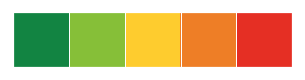

In [2]:
nutrition_palette = ["#128442", "#86BF38", "#FECC2E", "#EE7E26", "#E52F24"]
sns.set(palette=nutrition_palette)
sns.palplot(sns.color_palette())

## Importation de données

In [3]:
data = pd.read_csv("data/products.csv" , parse_dates=["created_datetime", "last_modified_datetime"])
data.columns = [col.replace("-", "_") for col in data.columns]

## Quelques statistiques sur les donnees (e.g nombre de lignes, colonnes, type des colonnes)

In [4]:
data_size = data.shape
nb_rows = data_size[0]
nb_columns = data_size[1]
print("nombre de lignes " ,nb_rows)
print("nombre de colonnes " ,nb_columns)
data.head()

nombre de lignes  230
nombre de colonnes  44


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,categories,categories_tags,...,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g,nutrition_score_fr_100g
0,11110050601,http://world-en.openfoodfacts.org/product/0011...,usda-ndb-import,1489067132,2017-03-09 13:45:32+00:00,1587581053,2020-04-22 18:44:13+00:00,Chicken & Rice Medley Soup,"Meals, Soups","en:meals,en:soups",...,0.024,8.98,1.22,0.4,4.49,1.0100,0.404,0.016,0.00015,5.0
1,11110050717,http://world-en.openfoodfacts.org/product/0011...,usda-ndb-import,1489067024,2017-03-09 13:43:44+00:00,1587580997,2020-04-22 18:43:17+00:00,Creamy tomato bisque,"Meals, Soups","en:meals,en:soups",...,0.020,7.76,4.49,1.6,1.22,0.7450,0.298,0.024,0.00029,7.0
2,11110074904,http://world-en.openfoodfacts.org/product/0011...,usda-ndb-import,1489136553,2017-03-10 09:02:33+00:00,1587628499,2020-04-23 07:54:59+00:00,"Soup, creamy potato and leek","Meals, Soups","en:meals,en:soups",...,0.016,8.57,1.22,0.8,1.63,0.8175,0.327,0.033,0.00044,6.0
3,11110658456,http://world-en.openfoodfacts.org/product/0011...,usda-ndb-import,1489144165,2017-03-10 11:09:25+00:00,1587635970,2020-04-23 09:59:30+00:00,Loaded Baked Potato Style Soup,"Meals, Soups","en:meals,en:soups",...,0.016,9.39,1.22,1.2,3.67,0.9700,0.388,0.041,0.00015,6.0
4,11110658463,http://world-en.openfoodfacts.org/product/0011...,usda-ndb-import,1489067009,2017-03-09 13:43:29+00:00,1587580989,2020-04-22 18:43:09+00:00,Creamy tomato bisque,"Meals, Soups","en:meals,en:soups",...,0.020,7.35,5.31,1.2,1.63,0.7050,0.282,0.016,0.00029,7.0


In [5]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype              
---  ------                                   --------------  -----              
 0   code                                     230 non-null    int64              
 1   url                                      230 non-null    object             
 2   creator                                  230 non-null    object             
 3   created_t                                230 non-null    int64              
 4   created_datetime                         230 non-null    datetime64[ns, UTC]
 5   last_modified_t                          230 non-null    int64              
 6   last_modified_datetime                   230 non-null    datetime64[ns, UTC]
 7   product_name                             230 non-null    object             
 8   categories                               230 non-null    object       

# Analyse univariée

## Normalisation de nutrition score

In [6]:
data.nutrition_score_fr_100g = -data.nutrition_score_fr_100g

### Analyse univariée de variable catégorielles

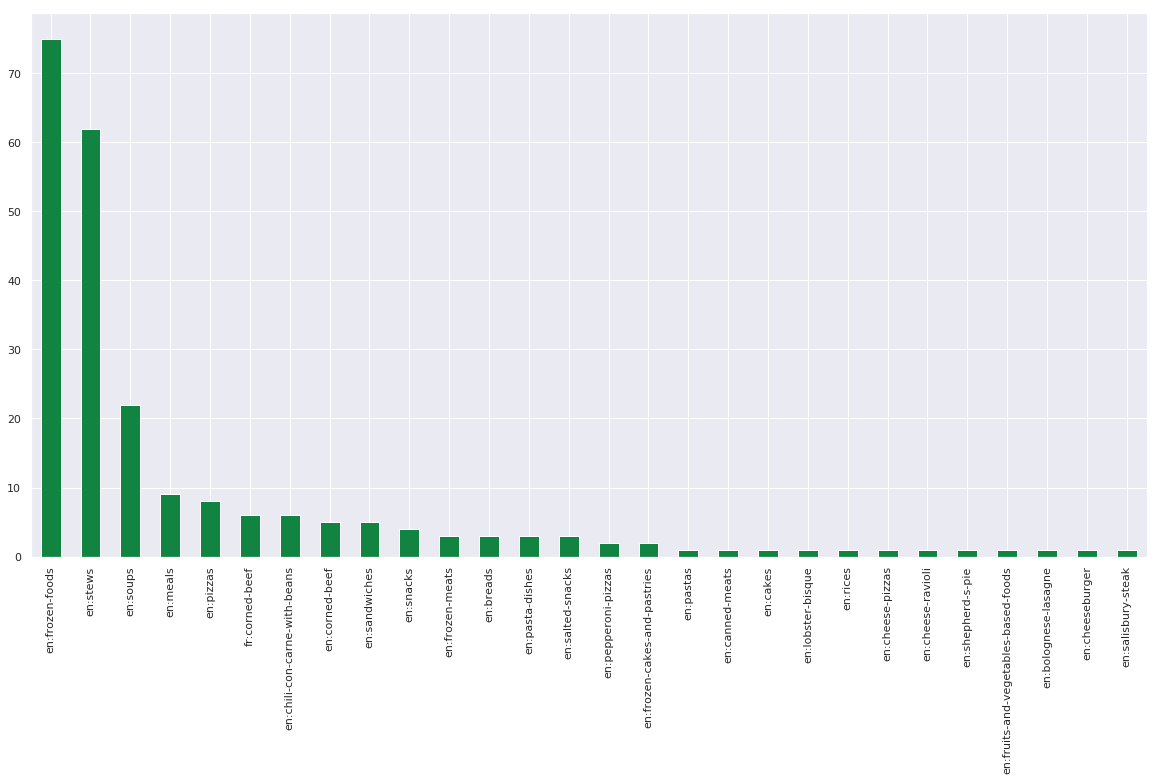

In [7]:
data.main_category.value_counts().plot.bar(figsize=(20,10))

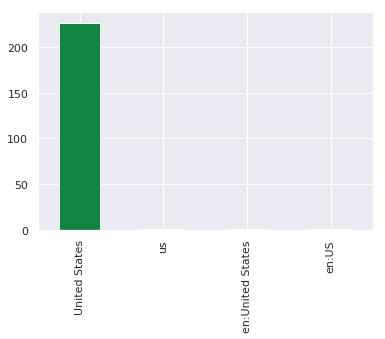

In [8]:
data.countries.value_counts().plot.bar()

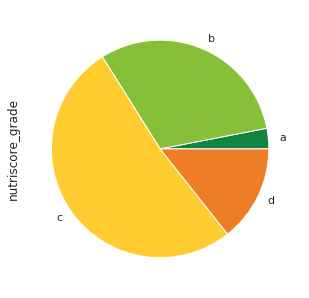

In [9]:
data.nutriscore_grade.value_counts().sort_index().plot.pie(figsize=(10,5))

In [10]:
brand_occurences = data.brand_owner.value_counts().to_dict()
brand_occurences

{'Nestle Usa-Frozen Food Division': 31,
 "Marie Callender's Retail Foods": 17,
 'Pinnacle Foods Group LLC': 16,
 'Heinz Frozen Food Company': 16,
 'Safeway, Inc.': 13,
 'The Kroger Co.': 12,
 'Hormel Foods Corporation': 10,
 'I-Health, Inc.': 9,
 'Conagra Brands': 8,
 'Big Y Foods, Inc.': 6,
 'Topco Associates, Inc.': 4,
 'Home Run Inn Frozen Foods Corp': 4,
 'Western Family Foods, Inc.': 4,
 'FRESH FOODS MARKET': 4,
 'FIRST STREET': 4,
 'Schnuck Markets, Inc.': 4,
 'Byerly Foods International': 4,
 'WICKED KITCHEN': 3,
 'SPARTAN': 3,
 'Iga, Inc.': 3,
 'Food Town Stores Inc.': 3,
 'NOT A BRANDED ITEM': 2,
 'Taylor Fresh Foods, Inc.': 2,
 'SHURFINE': 2,
 'Weis Markets, Inc.': 2,
 'Hannaford Bros. Co.': 2,
 'Kellogg Company US': 2,
 'H.J. Heinz Company': 2,
 'HARDY JACKS': 2,
 'ALE HAUS': 1,
 'Armour-Eckrich Meats LLC': 1,
 'GARDEN FRESH GOURMET': 1,
 'WILDSCAPE': 1,
 'Bruce Foods, Inc.': 1,
 'BOUDIN SOURDOUGH': 1,
 'Fish House Foods Company': 1,
 'BLACK ROCK': 1,
 'Goya Foods, Inc.': 1,

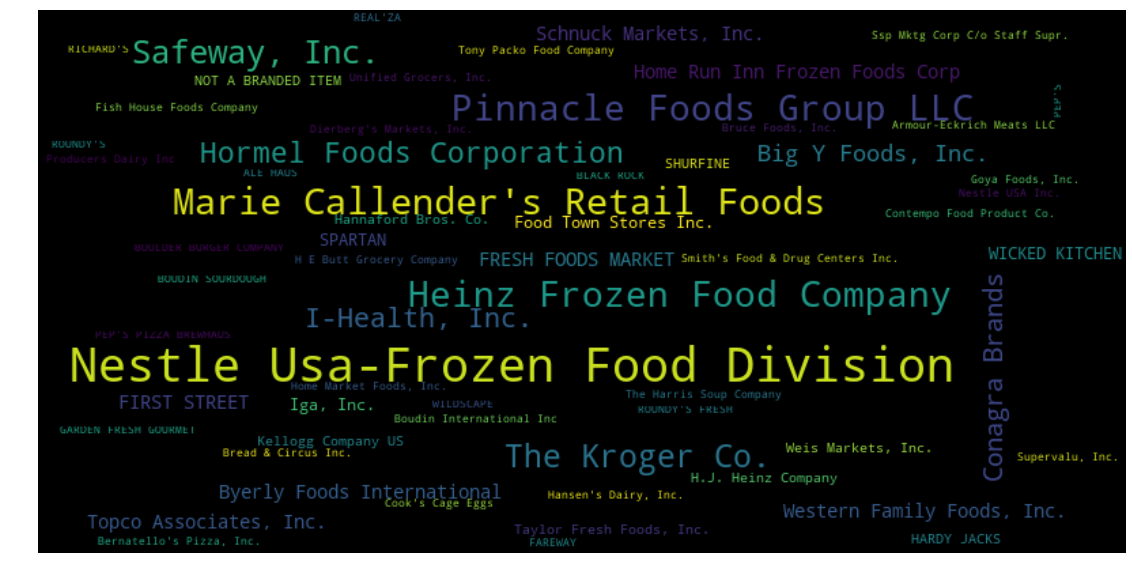

In [11]:
wordcloud = WordCloud(width = 800 , height = 400).generate_from_frequencies(brand_occurences)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud , interpolation = "bilinear")
_=plt.axis("off")

### Analyse univariée de variables continues

In [12]:
data.describe()

,code,created_t,last_modified_t,serving_quantity,additives_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,energy_100g,fat_100g,...,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g,nutrition_score_fr_100g
count,2.300000e+02,2.300000e+02,2.300000e+02,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.00000,...,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,2.470918e+10,1.552661e+09,1.587585e+09,254.586957,3.521739,0.017391,4.713043,3.952174,645.278261,8.40313,...,0.023422,12.693174,1.887000,1.342609,6.962391,0.943822,0.377529,0.067787,0.000804,-4.713043
std,1.093606e+10,4.683335e+07,2.642222e+06,57.146932,2.916143,0.131009,4.052635,0.213864,221.593851,3.60416,...,0.011148,5.526980,1.466444,0.747580,2.614423,0.204598,0.081839,0.063797,0.000475,4.052635
min,1.111005e+10,1.489053e+09,1.550328e+09,125.000000,0.000000,0.000000,-4.000000,3.000000,305.000000,1.39000,...,0.004000,1.990000,0.310000,0.300000,1.180000,0.435000,0.174000,0.008000,0.000140,-18.000000
25%,1.397571e+10,1.489072e+09,1.587583e+09,236.000000,1.000000,0.000000,2.000000,4.000000,486.250000,5.58250,...,0.016000,8.570000,0.880000,0.800000,5.650000,0.808125,0.323250,0.017000,0.000472,-6.000000
50%,2.113141e+10,1.587636e+09,1.587638e+09,245.000000,3.000000,0.000000,4.000000,4.000000,602.000000,7.73500,...,0.021500,11.895000,1.355000,1.200000,6.720000,0.958750,0.383500,0.045500,0.000730,-4.000000
75%,3.729620e+10,1.587659e+09,1.587662e+09,283.000000,5.000000,0.000000,6.000000,4.000000,739.750000,10.58250,...,0.030000,15.342500,2.465000,1.700000,8.050000,1.047500,0.419000,0.096750,0.001080,-2.000000
max,4.157354e+10,1.587677e+09,1.595652e+09,399.000000,12.000000,1.000000,18.000000,4.000000,1314.000000,19.29000,...,0.067000,30.000000,9.600000,3.600000,15.230000,1.480000,0.592000,0.283000,0.002650,4.000000


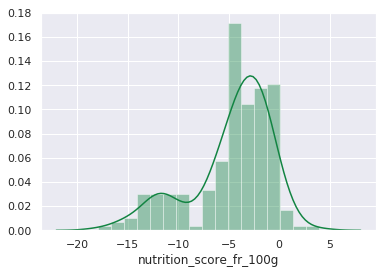

In [13]:
sns.distplot(data.nutrition_score_fr_100g)

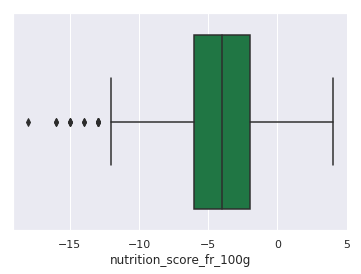

In [14]:
sns.boxplot(data.nutrition_score_fr_100g)

# Analyse multivariée

## Matrice de correlation

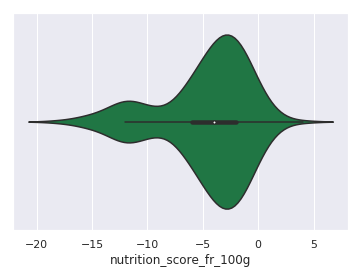

In [15]:
sns.violinplot(data.nutrition_score_fr_100g)

## Analysons la relation entre l'energie et le score de nutrition

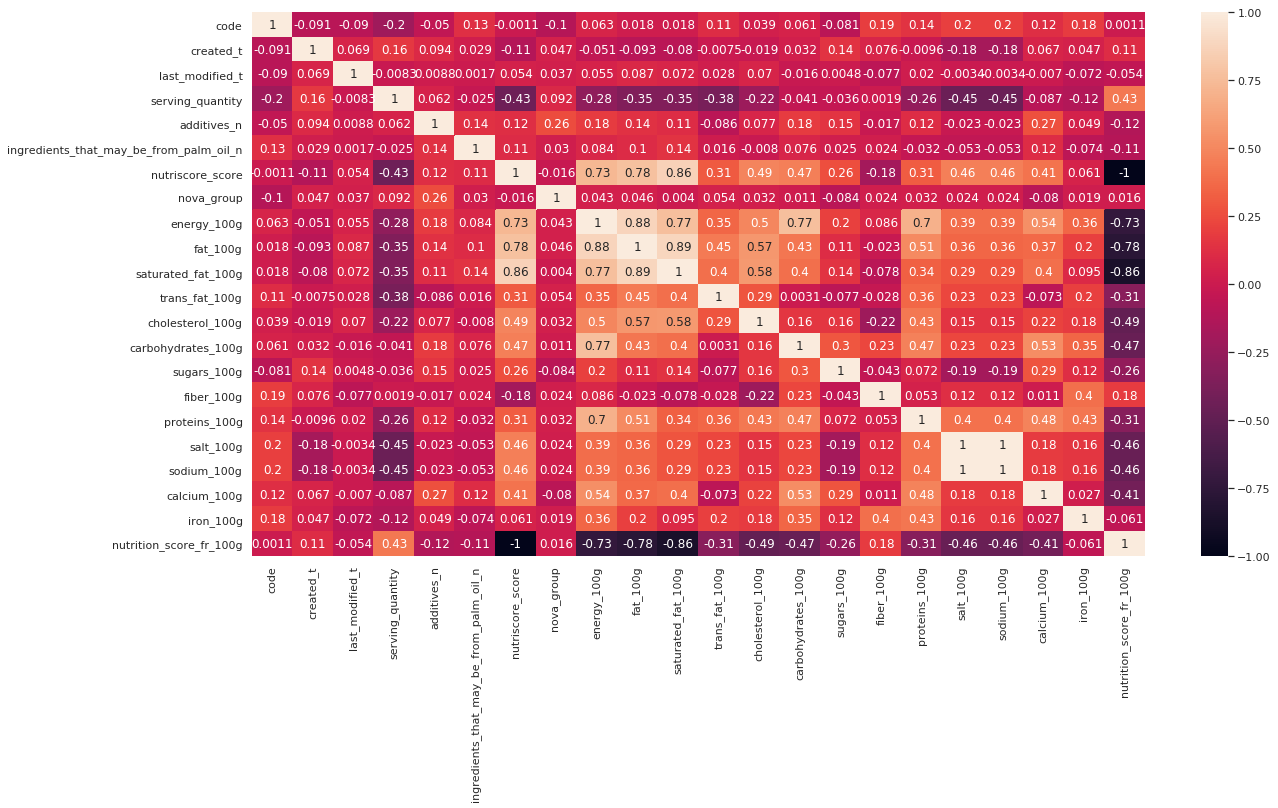

In [16]:
correlation = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True)

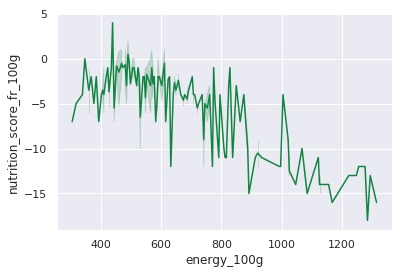

In [17]:
sns.lineplot(x = "energy_100g", y = "nutrition_score_fr_100g",data=data)

## evolution du nutrition score dans le temps

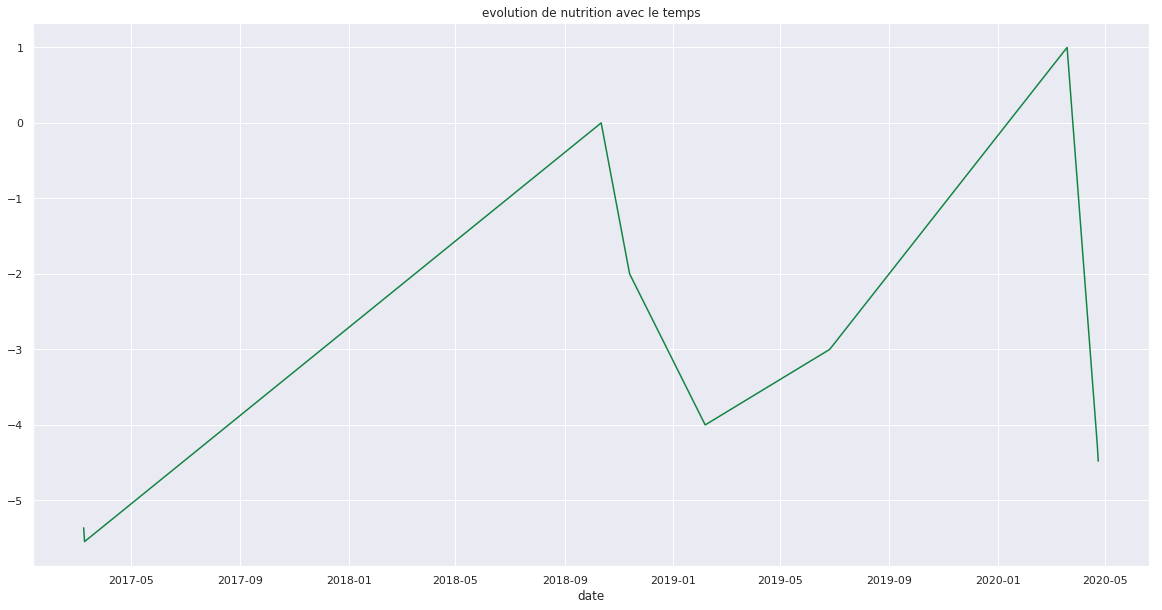

In [18]:
plt.figure(figsize=(20,10))
data["date"] = data.created_datetime.dt.date
data.groupby("date")["nutrition_score_fr_100g"].mean().plot(title="evolution de nutrition avec le temps")

## Analyse de la relation entre l'energie, le fat et le score de nutrition

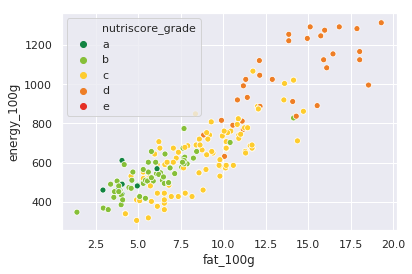

In [19]:
sns.scatterplot(x="fat_100g",y="energy_100g",hue="nutriscore_grade",data=data,hue_order=["a","b","c","d","e"])

## Score de nutrition vs Nutriscore grade

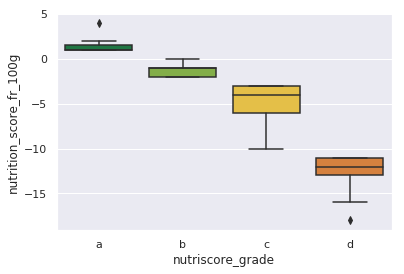

In [20]:
sns.boxplot(x="nutriscore_grade",y="nutrition_score_fr_100g",data=data ,
           order = ["a","b","c","d"])

### energie vs Nutriscore grade

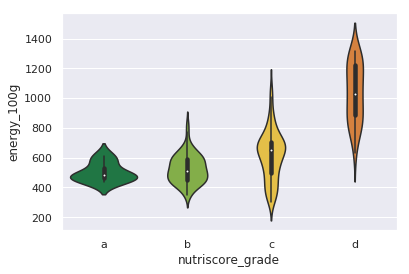

In [21]:
sns.violinplot(x="nutriscore_grade",y="energy_100g" , data=data, order = ["a","b","c","d"]
              )

## Distribution du score de nutrition par categorie de produits

In [22]:
data.main_category = data.main_category.apply(lambda cat:cat.replace("en","").replace("fr",""))
res = data[["main_category","nutriscore_grade","code"]].\
groupby(["main_category","nutriscore_grade"]).count()
res = res.reset_index()
res.head()

,main_category,nutriscore_grade,code
0,:bolognese-lasagne,b,1
1,:breads,c,3
2,:cakes,b,1
3,:canned-meats,c,1
4,:cheese-pizzas,d,1


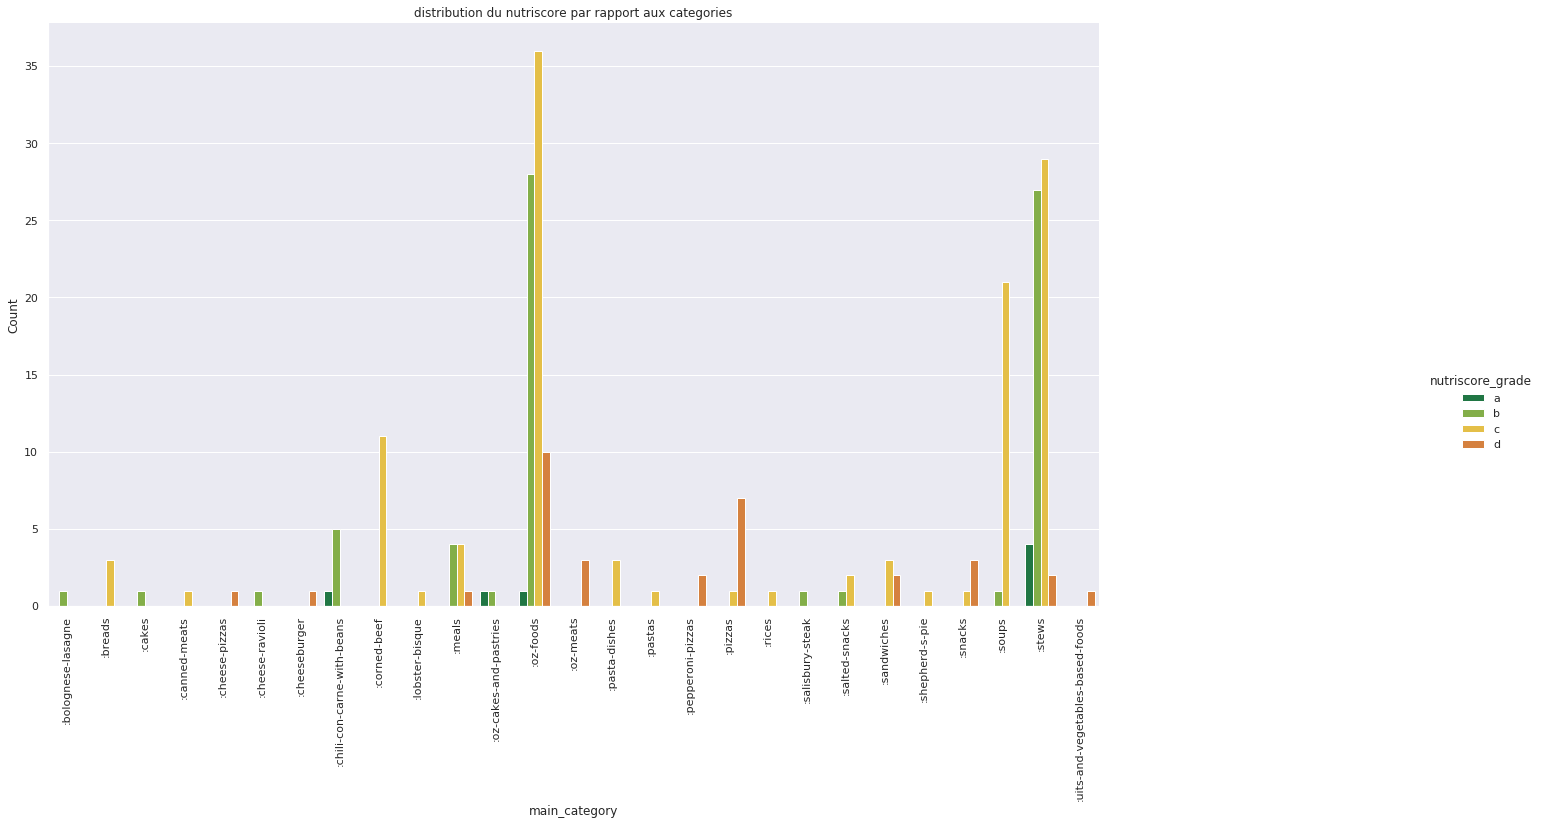

In [23]:
g = sns.catplot(x="main_category", 
               y = "code",
               hue="nutriscore_grade",
               hue_order= ["a","b","c","d"],
               data = res,
               kind="bar")
g.set_axis_labels("main_category","Count")
g.set(title="distribution du nutriscore par rapport aux categories")
g.fig.set_figwidth(25)
g.fig.set_figheight(10)
g.set_xticklabels(rotation=90)

### Analyse par pair de variable

In [25]:
num_columns = data.select_dtypes(include=["float"]).columns
num_columns

Index(['serving_quantity', 'additives_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nova_group', 'energy_100g', 'fat_100g', 'saturated_fat_100g',
       'trans_fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'calcium_100g', 'iron_100g', 'nutrition_score_fr_100g'],
      dtype='object')

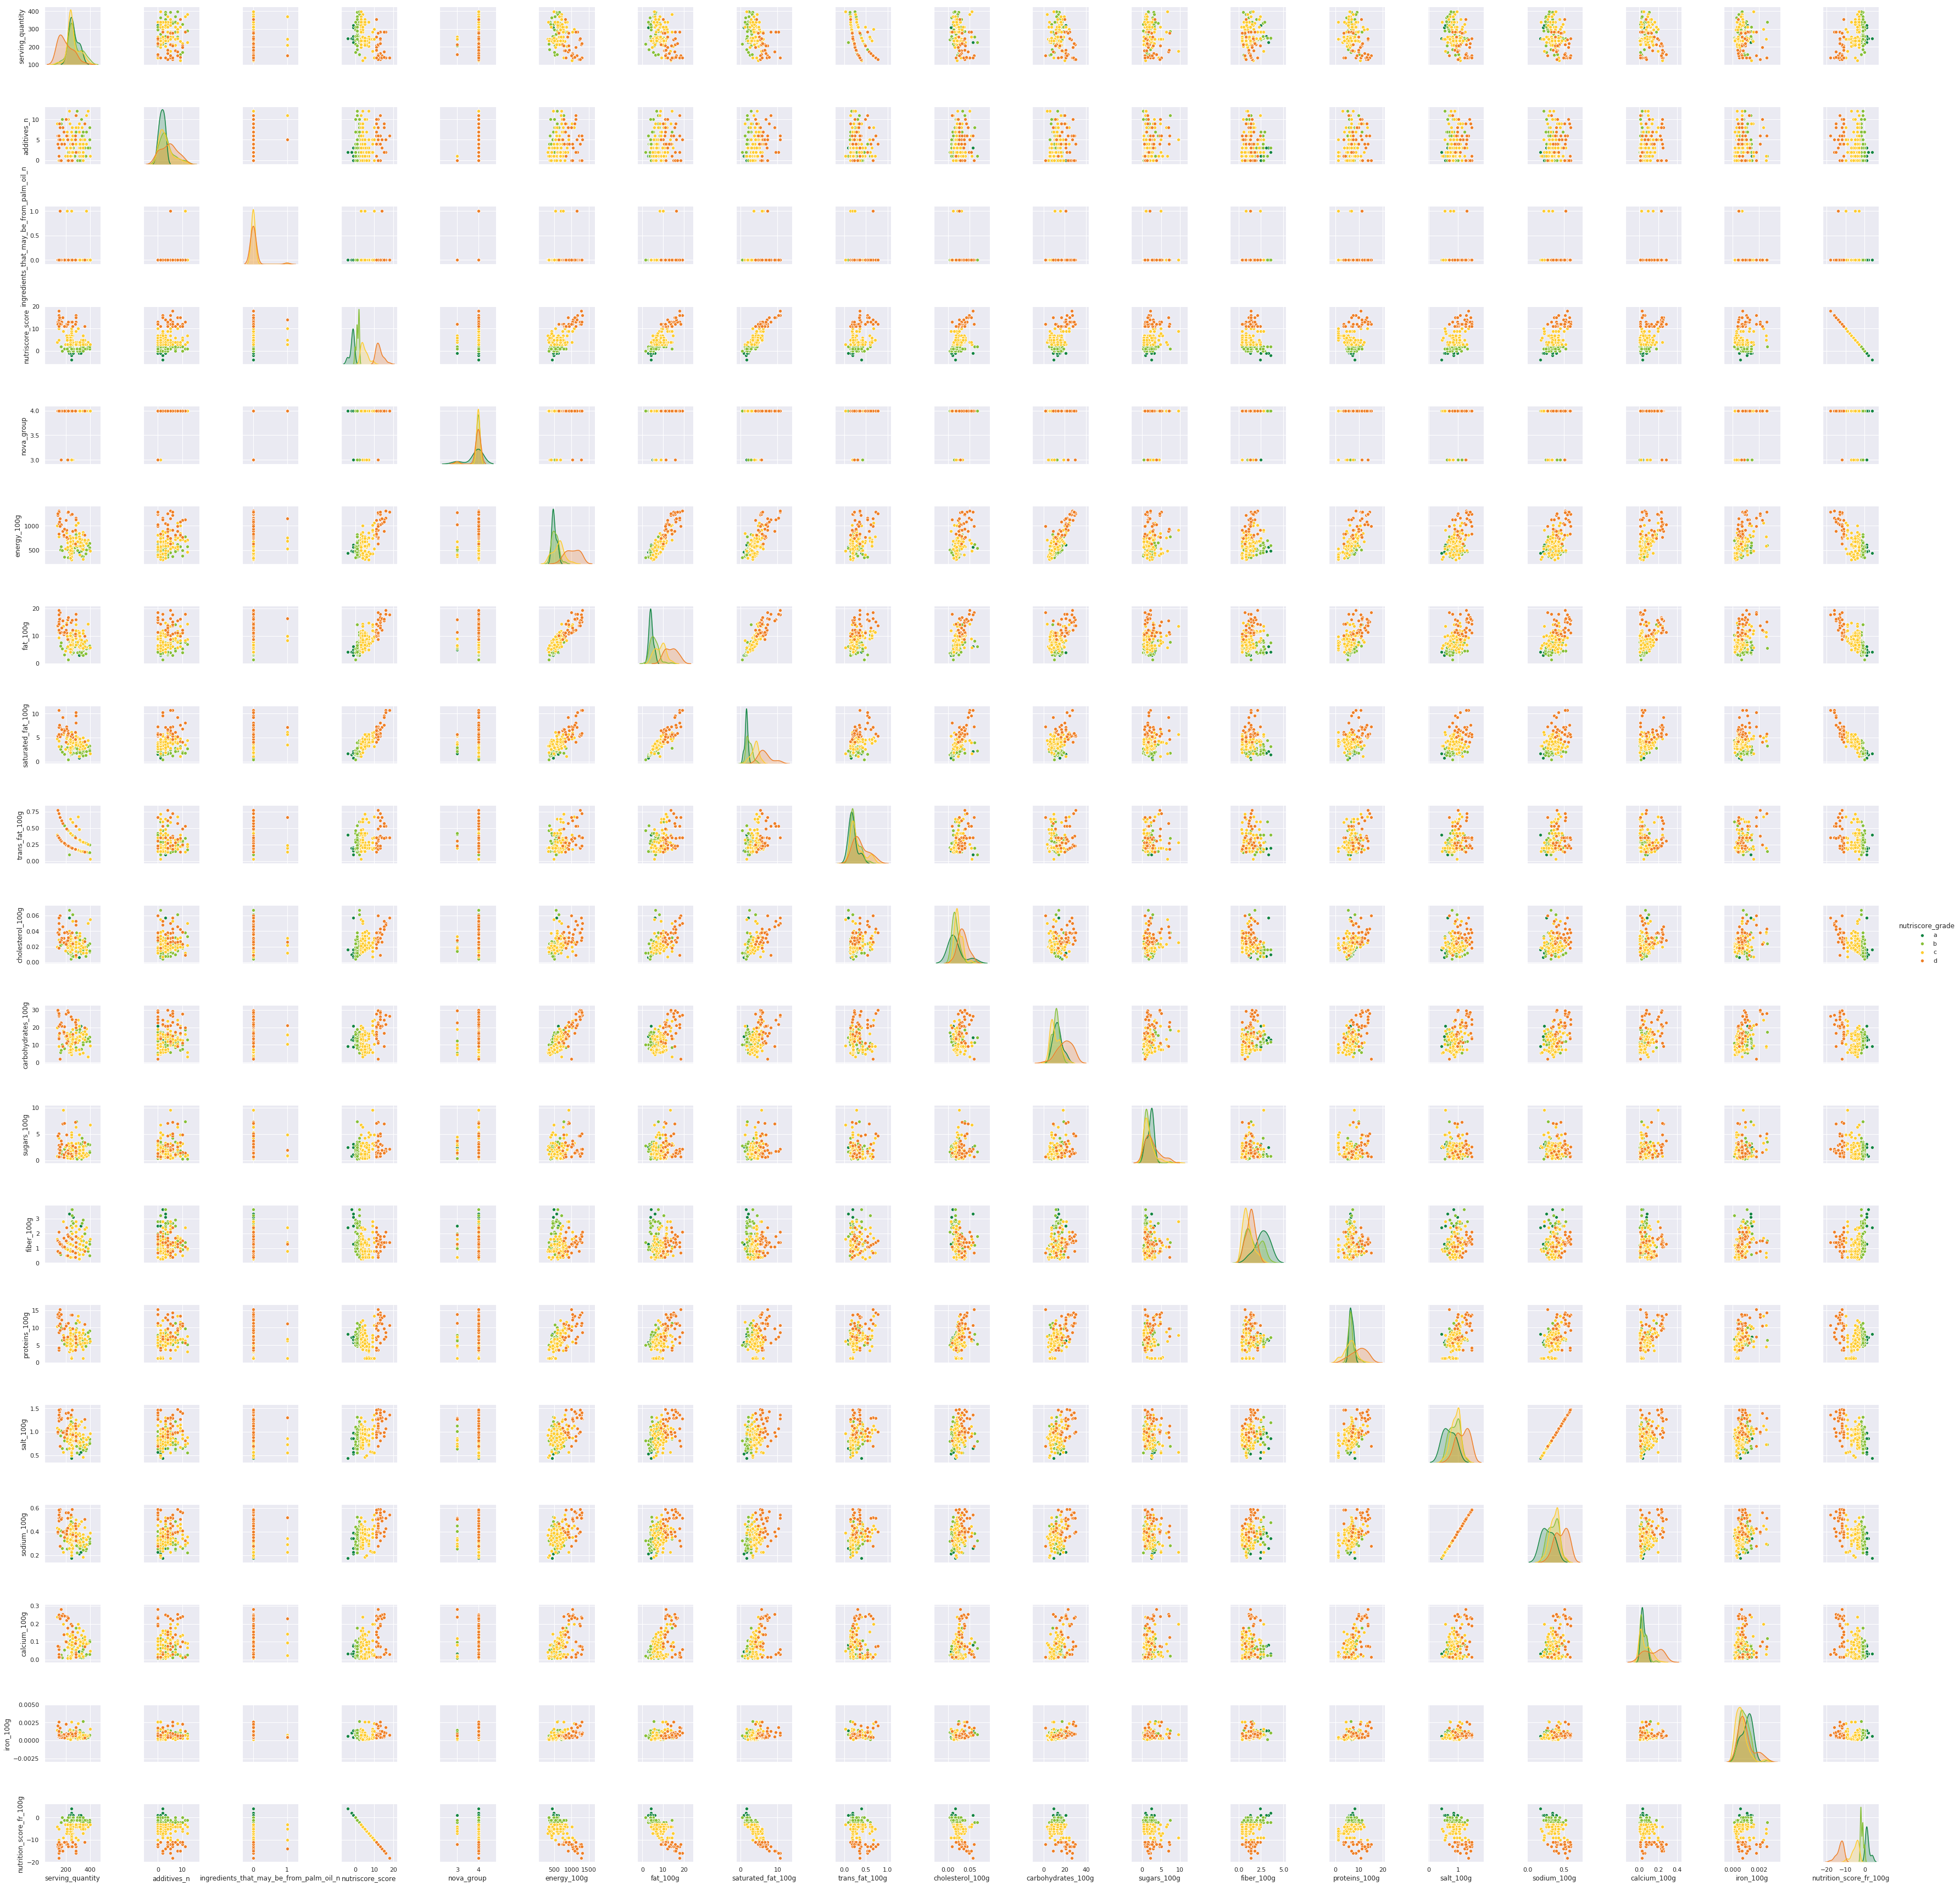

In [27]:
sns.pairplot(x_vars=num_columns,y_vars=num_columns,data=data, hue="nutriscore_grade",hue_order = ["a","b","c","d"])

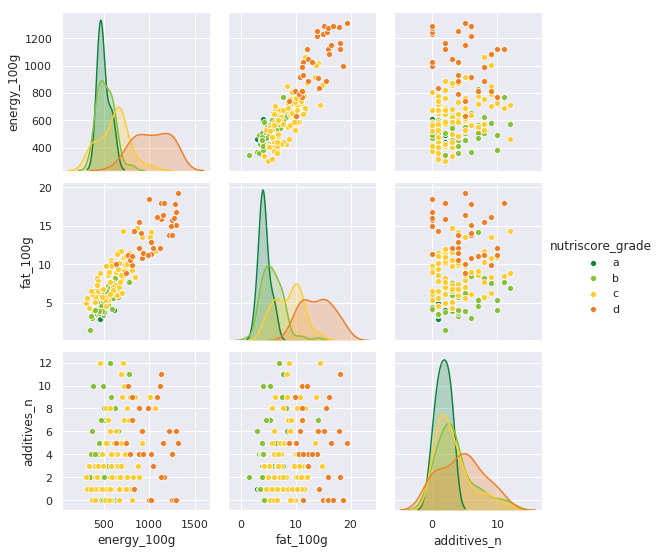

In [28]:
sns.pairplot(x_vars=["energy_100g","fat_100g","additives_n"],
            y_vars=["energy_100g","fat_100g","additives_n"],data=data,hue="nutriscore_grade",hue_order =  ["a","b","c","d"])